# BitTrack Project
## Send request and Get data

In [43]:
import requests
import csv
import json

import datetime
import time
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

# Time in UNIX format
month = 2629743
now = int(time.time())
start_time = now - 3*month
DATALENGTH = 5000
ema_length = 50

url = f"http://api.coincap.io/v2/assets/bitcoin/history?interval=h1"
print(url)

# Request data from the API
response = requests.request("GET", url, headers={}, data={})
json_data = json.loads(response.text.encode('utf8'))
# print(json_data)
bitcoin_data = json_data["data"]

df = pd.DataFrame(bitcoin_data)
## Export data as a csv file
# df.to_csv('BTCUSD.csv', index=False)
print(df.sample)
# df.dtypes

# Filter only the columns we need
df = pd.DataFrame(bitcoin_data, columns=['time', 'priceUsd'])
# Get last 200 rows and REVERSE, newest price on top (index 0)
df = df[:-DATALENGTH-1:-1]
print(df.sample)

# Convert 'priceUsd' datatype to something numeric
df['priceUsd'] = pd.to_numeric(df['priceUsd'], errors='coerce', downcast='integer').fillna(0, downcast='infer')
df.dtypes
df.info()

http://api.coincap.io/v2/assets/bitcoin/history?interval=h1
<bound method NDFrame.sample of                    priceUsd           time          circulatingSupply  \
0    37946.1965886861029742  1623988800000  18737550.0000000000000000   
1    37988.0795797952287274  1623992400000  18737550.0000000000000000   
2    37657.3802818171791375  1623996000000  18737625.0000000000000000   
3    37491.1383066607041878  1623999600000  18737625.0000000000000000   
4    37711.4134682460983704  1624003200000  18737706.0000000000000000   
..                      ...            ...                        ...   
715  31653.2266417037913263  1626562800000  18743737.0000000000000000   
716  31558.9108917651617318  1626566400000  18743737.0000000000000000   
717  32002.0251587829924050  1626570000000  18743737.0000000000000000   
718  32203.4798020065580475  1626573600000  18743737.0000000000000000   
719  32197.4953072294716337  1626577200000  18743737.0000000000000000   

                         date  

In [44]:
# Check data 
prices = df['priceUsd']
print(prices)

719    32197.495307
718    32203.479802
717    32002.025159
716    31558.910892
715    31653.226642
           ...     
4      37711.413468
3      37491.138307
2      37657.380282
1      37988.079580
0      37946.196589
Name: priceUsd, Length: 720, dtype: float64


In [45]:
# Calculate and check last ema value 
count = 0
def ema(prices, count, length = ema_length, smoothing = 2):
    multiplier = smoothing/(1+length)
    if count < length:
        # print(prices.iloc[count])
        price = (prices.iloc[count] * multiplier) 
        count += 1
        return price + ema(prices, count ) * (1 - multiplier)
    return prices.iloc[count]

In [46]:
print("EMA50 H1:", ema(df['priceUsd'], count))

EMA50 H1: 31715.366378877596


In [47]:
# Process UNIX time to readable form
timeStamp =  df['time'].values.tolist()
timeStamp = [x / 1000 for x in timeStamp]

In [48]:
# Insert readable timeStamp column to 'df'
df['timeStamp'] = pd.to_datetime(timeStamp, unit='s')

In [49]:
# Check
df.sample

<bound method NDFrame.sample of               time      priceUsd           timeStamp
719  1626577200000  32197.495307 2021-07-18 03:00:00
718  1626573600000  32203.479802 2021-07-18 02:00:00
717  1626570000000  32002.025159 2021-07-18 01:00:00
716  1626566400000  31558.910892 2021-07-18 00:00:00
715  1626562800000  31653.226642 2021-07-17 23:00:00
..             ...           ...                 ...
4    1624003200000  37711.413468 2021-06-18 08:00:00
3    1623999600000  37491.138307 2021-06-18 07:00:00
2    1623996000000  37657.380282 2021-06-18 06:00:00
1    1623992400000  37988.079580 2021-06-18 05:00:00
0    1623988800000  37946.196589 2021-06-18 04:00:00

[720 rows x 3 columns]>

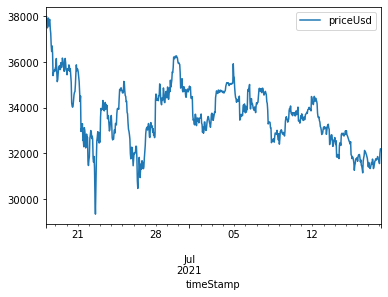

In [50]:
# Plot the data
df.plot(x ='timeStamp', y='priceUsd', kind = 'line')
plot.show()

## Calculate the possible EMA for each timeStamp
'possible' means timeStamp that have at lease 50 values before it. After that, we add EMA value along with the above figure.

In [51]:
short_df = df.head(DATALENGTH-ema_length)
short_df.reset_index()

,index,time,priceUsd,timeStamp
0,719,1626577200000,32197.495307,2021-07-18 03:00:00
1,718,1626573600000,32203.479802,2021-07-18 02:00:00
2,717,1626570000000,32002.025159,2021-07-18 01:00:00
3,716,1626566400000,31558.910892,2021-07-18 00:00:00
4,715,1626562800000,31653.226642,2021-07-17 23:00:00
...,...,...,...,...
715,4,1624003200000,37711.413468,2021-06-18 08:00:00
716,3,1623999600000,37491.138307,2021-06-18 07:00:00
717,2,1623996000000,37657.380282,2021-06-18 06:00:00
718,1,1623992400000,37988.079580,2021-06-18 05:00:00


In [52]:
short_df['EMA'] = np.zeros(( DATALENGTH-ema_length, 1))

ValueError: Length of values (950) does not match length of index (720)

In [39]:
# short_df['N'] = np.arange(len(short_df))
short_df.insert(loc=0, column='N', value=np.arange(len(short_df)))

In [40]:
# Try modifying a value in EMA column
short_df.loc[713,'EMA'] = 999999
# Try accessing short_df
print(short_df['EMA'].iloc[-1])

0.0
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [41]:
# Finalize 'ema' function to run in for loop
def ema(prices, count, length = ema_length, smoothing = 2):
    multiplier = smoothing/(1+length)
    if count < length:
        # print(prices.iloc[count])
        price = (prices.iloc[count] * multiplier) 
        count += 1
        return price + ema(prices, count ) * (1 - multiplier)
    return prices.iloc[count]

# Calculate ema values and replace them into the dataframe
for i in range(0, DATALENGTH-ema_length):
    count = 0
    # short_df.iloc[ ?,4 ] => 'EMA' column
    short_df.iloc[ i,4 ] = ema( df['priceUsd'].iloc[ i: ], count )


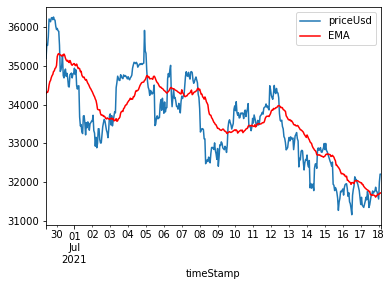

In [42]:
# Reference article https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot
ax = plot.gca()
short_df.plot(kind='line',x='timeStamp',y='priceUsd', ax=ax)
short_df.plot(kind='line',x='timeStamp',y='EMA', color='red', ax=ax)
plot.show()

## Create a while loop to update price constantly

## Alarm when PRICE cross EMA

## Analyze profit/loss if trade base on EMA 
using data in the past 1 year  
with R:R=1:1, TP = SL = 5%  
TP 80% when reach target, move SL to entry

